Loading MNIST dataset...
Original dataset shape: (70000, 784)
Running UMAP...


d:\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


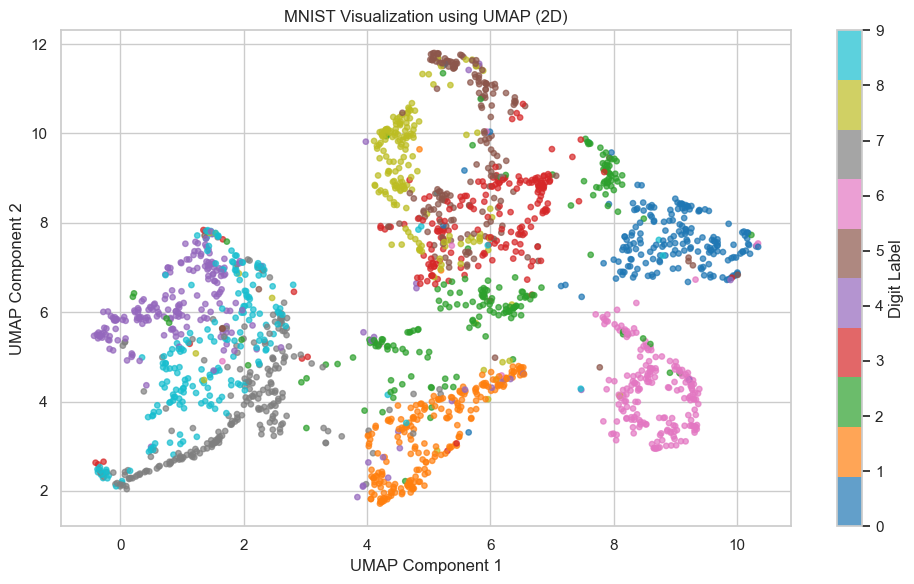

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import umap

# Set seaborn style for cleaner plots
sns.set(style='whitegrid')

# -----------------------------
# Step 1: Load the MNIST dataset
# -----------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Original dataset shape: {X.shape}")  # (70000, 784)

# -----------------------------
# Step 2: Sample a subset for performance
# -----------------------------
# UMAP is faster than T-SNE but we still use a subset
SAMPLE_SIZE = 2000
X_sample = X[:SAMPLE_SIZE]
y_sample = y[:SAMPLE_SIZE]

# -----------------------------
# Step 3: Standardize the data
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# -----------------------------
# Step 4: Apply UMAP to reduce to 2D
# -----------------------------
print("Running UMAP...")
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# -----------------------------
# Step 5: Plot the UMAP results
# -----------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Visualization using UMAP (2D)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
